In [30]:
import igraph as ig
import matplotlib.pyplot as plt
import random

In [31]:
random.seed(0)

In [32]:
g1 = ig.Graph.Erdos_Renyi(n=15, p=0.2, directed=False, loops=False)
g2 = ig.Graph.Erdos_Renyi(n=15, p=0.2, directed=False, loops=False)

In [33]:
g3 = ig.Graph.Erdos_Renyi(n=20, m=35, directed=False, loops=False)
g4 = ig.Graph.Erdos_Renyi(n=20, m=35, directed=False, loops=False)

In [34]:
ig.summary(g1)
ig.summary(g2)
ig.summary(g3)
ig.summary(g4)

IGRAPH U--- 15 23 -- 
IGRAPH U--- 15 28 -- 
IGRAPH U--- 20 35 -- 
IGRAPH U--- 20 35 -- 


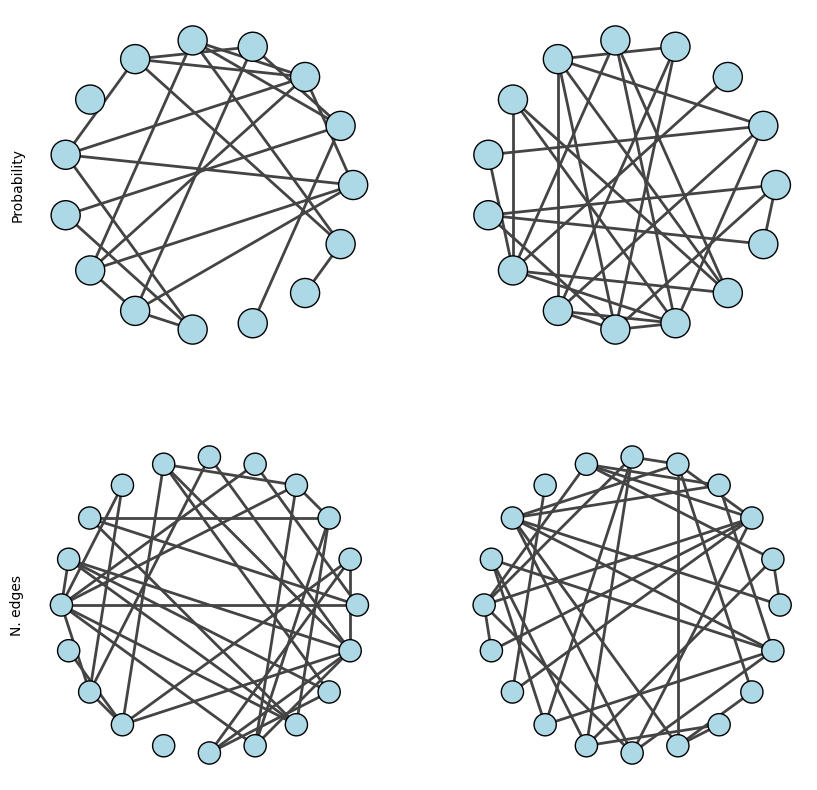

In [35]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Probability
ig.plot(
    g1,
    target=axs[0, 0],
    layout="circle",
    vertex_color="lightblue"
)
ig.plot(
    g2,
    target=axs[0, 1],
    layout="circle",
    vertex_color="lightblue"
)
axs[0, 0].set_ylabel('Probability')
# N edges
ig.plot(
    g3,
    target=axs[1, 0],
    layout="circle",
    vertex_color="lightblue",
    vertex_size=0.15
)
ig.plot(
    g4,
    target=axs[1, 1],
    layout="circle",
    vertex_color="lightblue",
    vertex_size=0.15
)
axs[1, 0].set_ylabel('N. edges')
plt.show()

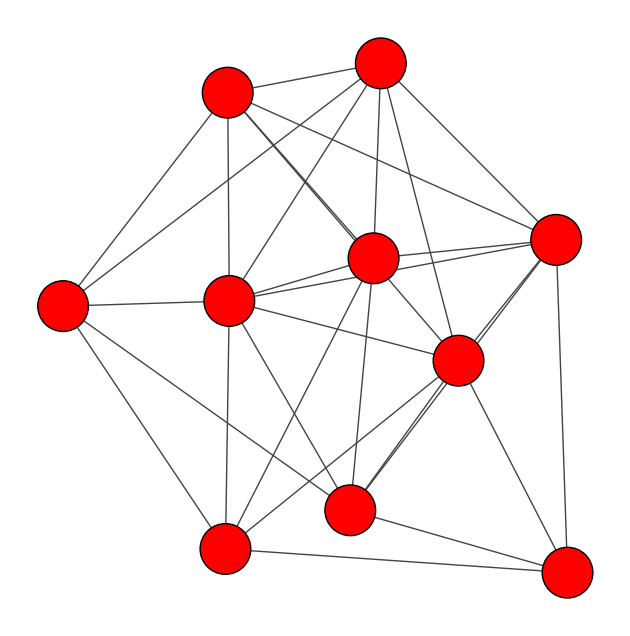

In [36]:
watts_g = ig.Graph.Watts_Strogatz(dim=1, size=10, nei=3, p=0.5)

fig, ax = plt.subplots(figsize=(8, 8))
ig.plot(
        watts_g,
        target=ax,
        vertex_size=0.3,
        edge_width=1,
    )
plt.show()

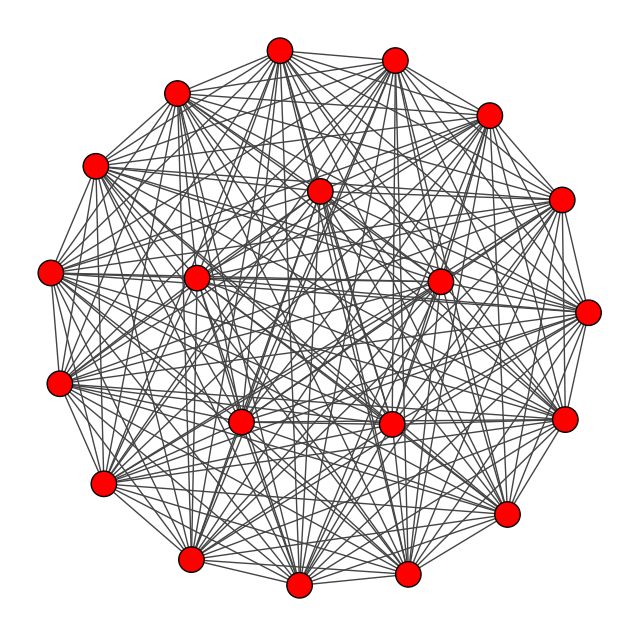

In [37]:
barabasi_g = ig.Graph.Barabasi(n=20, m=35)

fig, ax = plt.subplots(figsize=(8, 8))
ig.plot(
        barabasi_g,
        target=ax,
        vertex_size=0.3,
        edge_width=1,
    )
plt.show()

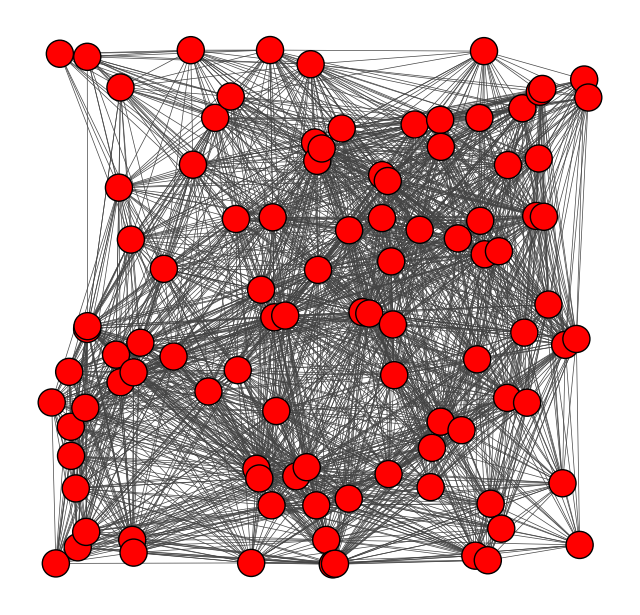

In [38]:
# Create random exponential family graph with 100 nodes and 500 edges
g = ig.Graph.GRG(n=100, radius=0.5)

# Plot the graph
fig, ax = plt.subplots(figsize=(8, 8))
ig.plot(
        g,
        target=ax,
        vertex_size=0.05,
        edge_width=0.5,
    )
plt.show()

In [39]:
road_network_graph = None
with open('roadNet-PA.txt', 'r') as f:
    road_network_graph = ig.Graph.Read_Edgelist(f, directed=False)

In [40]:
ig.summary(road_network_graph)

IGRAPH U--- 1090920 3083796 -- 


In [41]:
def random_attack(graph, n):
    g = graph.copy()
    for i in range(n):
        g.delete_vertices(random.choice(g.vs))
    return g

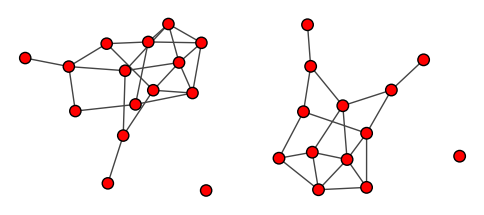

In [42]:
gRT = random_attack(g1, 2)
fig, ax = plt.subplots(1, 2, figsize=(6, 12))
ig.plot(
	g1,
	target=ax[0],
	vertex_size=0.3,
	edge_width=1,
)
ig.plot(
	gRT,
	target=ax[1],
	vertex_size=0.3,
	edge_width=1,
)
plt.show()

In [43]:
def recalculated_degree_removal_attack(graph, n):
    g = graph.copy()
    for i in range(n):
        g.delete_vertices(g.vs.select(_degree_eq=max(g.degree())))
    return g

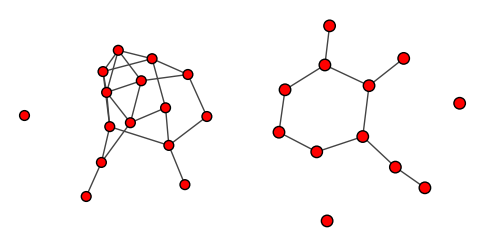

In [44]:
gRT = recalculated_degree_removal_attack(g1, 2)
fig, ax = plt.subplots(1, 2, figsize=(6, 12))
ig.plot(
	g1,
	target=ax[0],
	vertex_size=0.3,
	edge_width=1,
)
ig.plot(
	gRT,
	target=ax[1],
	vertex_size=0.3,
	edge_width=1,
)
plt.show()

In [45]:
def recalculated_betweenness_removal_attack(graph, n):
    g = graph.copy()
    for i in range(n):
        g.delete_vertices(g.vs.select(_betweenness_eq=max(g.betweenness())))
    return g

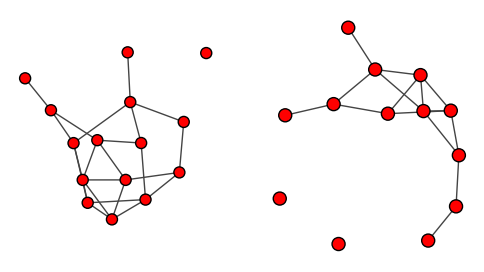

In [46]:
gRT = recalculated_betweenness_removal_attack(g1, 2)
fig, ax = plt.subplots(1, 2, figsize=(6, 12))
ig.plot(
	g1,
	target=ax[0],
	vertex_size=0.3,
	edge_width=1,
)
ig.plot(
	gRT,
	target=ax[1],
	vertex_size=0.3,
	edge_width=1,
)
plt.show()